<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_kep_stilus_atalakitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![TF](https://1.bp.blogspot.com/-eb-_3Aqu5bA/XnertoOpPgI/AAAAAAAAa6Y/8TPaJ8vjn2cN_so7xLeqPZDqX3pQjVARgCLcBGAsYHQ/s200/tf.jpg)


# Neural style transfer picures

----


A Deep Dream mellett a mély tanulás-vezérelt képmódosításban egy másik jelentős fejlemény, amely 2015 nyarán történt, az idegrendszer
stílusátadás.
A neurális stílusátvivő algoritmus sok finomításon mentek keresztül, és sok változata jött létre.

A neurális stílusátvitel abból áll, hogy a referenciakép "stílusát" alkalmazzák egy célképre, miközben megőrzi a cél "tartalmát".

---

Minta kép stilus átvitelre:

![style transfer](https://1.bp.blogspot.com/-4pVLfMFY1eE/Xne0fcLF0QI/AAAAAAAAa6k/ijKMpn7aUUYJJERkXyPmHmFKDAcwMXNZgCLcBGAsYHQ/s400/silus_atvitel.jpg)


In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'


---

A "stílus" alatt lényegében a textúrák, a színek és a képi minták szerepelnek, különféle térbeli skálákban, míg a "tartalom" a kép magasabb szintű makrostruktúrája. 

Például a kék-sárga kör alakú ecsetvonásokat a fenti példában "stílusnak" tekintik a Van Gogh Csillagos éjszaka felhasználásával, míg a Tuebingen fényképén szereplő épületek "tartalomnak" tekinthetők.

A stílusátvitel gondolatának, amely szorosan összekapcsolódik a textúragenerációval, hosszú ideje volt a képfeldolgozó közösségben, mielőtt 2015-ben kifejlesztette a neurális stílusátadást.

 Mint azonban kiderült, a stílus mély, tanuláson alapuló megvalósítása Az átadás olyan páratlan eredményeket hozott, amelyek összehasonlíthatatlanok voltak abban, amit korábban el lehet érni a klasszikus számítógépes látástechnikákkal, és elképesztő reneszánst váltott ki a számítógépes látás kreatív alkalmazásaiban.

 ---


```
loss = distance(style(reference_image) - style(generated_image)) +
       distance(content(original_image) - content(generated_image))
```

---

Ennek a veszteségnek a minimalizálása azt eredményezi, hogy a "stílus (létrehozott kép)" közel áll a "stílus (referencia_kép)", míg a "tartalom (létrehozott kép)" közel kell lennie a "tartalomhoz (létrehozott kép)", ezáltal elérheti a stílusátadást, ahogyan azt meghatároztuk.

Gatys és munkatársainak egyik alapvető megfigyelése az, hogy a mély konvolúciós neurális hálózatok pontosan lehetőséget kínálnak a matematikai meghatározásra
a "stílus" és a "tartalom" funkciókat.

A stílusátvitel megvalósításának kulcseleme ugyanaz az ötlet, amely központi jelentőségű az összes mélyreható tanulási algoritmusban: meghatározunk egy veszteségfüggvényt annak meghatározására, hogy mit akarunk elérni, és minimalizáljuk ezt a veszteséget.

 Tudjuk, mit akarunk elérni: őrizzük meg az eredeti kép "tartalmát", miközben elfogadjuk a referenciakép "stílusát". 
 
 Ha képesek lennénk matematikailag meghatározni a tartalmat és a stílust, akkor a minimalizálás megfelelő veszteségfüggvénye a következő:
 


## A tartalom elvesztése

Mint már tudjuk, a hálózat korábbi rétegeiből származó aktiválások helyi információkat tartalmaznak a képről, míg a magasabb rétegekből származó aktiválások egyre inkább globális és elvont információkat tartalmaznak. 

Másképpen megfogalmazva a convnet különféle rétegeinek aktiválása a kép tartalmának lebontását teszi lehetővé különböző térbeli skálán. 

Ezért elvárjuk, hogy egy kép globálisabb és elvontabb "tartalmát" a convnet felső rétegének ábrázolása megragadja.

A tartalomvesztés megfelelő jelöltje tehát egy előre kiképzett konvnet mérlegelése, és veszteségként meghatározza az L2 normát a felső képen kiszámított felső réteg aktiválása és a generált képen kiszámított ugyanazon réteg aktiválása között. 
 Ez garantálná, hogy a convnet felső rétegéből látható, hogy a létrehozott kép "hasonlít" az eredeti célképhez. Feltételezve, hogy a convnet felső rétegei valójában a bemenő képek „tartalma”, akkor ez a képtartalom megőrzésének módja.

## A stílusvesztés

Míg a tartalomvesztés csak egyetlen magasabb szintű réteget von maga után.
A papír a convnet több rétegét használja ki: a stílus-referenciakép megjelenését arra törekszünk, hogy az összes convnet által kivont térbeli skálán, és ne csak egyetlen skálán szerepeljen.

A stílus elvesztése érdekében a Gatys et al. A papír kihasználja a réteg aktiválásának "Gram-mátrixát", azaz az adott réteg jellemzőinek térképei közötti belső terméket. Ez a belső termék úgy értelmezhető, hogy egy réteg jellemzői közötti összefüggések térképét ábrázolja. 

Ezek a tulajdonságkorrelációk rögzítik egy adott térbeli skála mintázatainak statisztikáit, amelyek empirikusan megfelelnek az ezen a skálán található textúrák megjelenésének.

Ezért a stílusvesztés célja a hasonló belső összefüggések megőrzése a különböző rétegek aktiválása során, a stílus referenciaképen és a létrehozott képen. 

Ez viszont garantálja, hogy a különféle térbeli skálákban található textúrák hasonlóak lesznek a stílus-referenciaképen és a létrehozott képen


## Röviden

 egy előre képzett konvnet segítségével meghatározhatjuk a veszteséget, amely:

A tartalom megőrzése hasonló magas szintű rétegek aktiválásának fenntartásával a céltartalom-kép és a létrehozott kép között. 

A konvnetnek "látnia" kell a célképet és a létrehozott képet, mint "ugyanazokat a dolgokat tartalmazza".

A stílus megőrzése érdekében hasonló korrelációkat kell fenntartani az aktiválások során mind az alacsony, mind a magas szintű rétegekre. Valójában a tulajdonságkorrelációk rögzítik a textúrákat: a létrehozott és a stílus referenciaképnek ugyanazon textúráknak kell lennie különböző térbeli skálákban.


Most vessünk egy pillantást az eredeti 2015 idegi stílusú átviteli algoritmus Keras megvalósítására. Mint láthatja, sok hasonlóságot mutat az előző szakaszban kifejlesztett Deep Dream megvalósítással.



## Neurális stílusátvitel Kerasban

A neurális stílusátvitel bármilyen előre képzett konvnet segítségével megvalósítható. Itt a VGG19 hálózatot fogjuk használni, amelyet Gatys és társai használtak a cikkükben. A VGG19 az 5. fejezetben bemutatott VGG16 hálózat egyszerű változata, három további konvolúciós réteggel.

Ez az általános folyamatunk:

Állítson be egy hálózatot, amely kiszámítja a VGG19 réteg aktiválásait a stílus referenciakép, a célkép és a generált kép számára egyidejűleg.
A fenti három képen kiszámított réteg aktiválásokkal határozhatja meg a fent leírt veszteségfüggvényt, amelyet minimalizálunk a stílusátvitel elérése érdekében.

Állítson be egy gradiens leszállási folyamatot ennek a veszteség funkciónak a minimalizálása érdekében.

Kezdjük azzal, hogy meghatározzuk a figyelembe vett két kép elérési útját: a stílus referenciaképet és a cél képet. Annak biztosítása érdekében, hogy az összes feldolgozott kép hasonló méretű legyen (széles körben eltérő méretek megnehezítik a stílusátvitelt), később átméretezzük mindegyik megosztott 400px magasságot.

In [0]:
from keras.preprocessing.image import load_img, img_to_array

# This is the path to the image you want to transform.
target_image_path = 'Tubingen.jpg'
# This is the path to the style image.
style_reference_image_path = 'transfer_style_reference.jpg'

# Dimensions of the generated picture.
width, height = load_img(target_image_path).size
img_height = 400
img_width = int(width * img_height / height)

Szükségünk lesz néhány kiegészítő funkcióra a VGG19 konvnetbe be- és kimenő képek betöltéséhez, előfeldolgozásához és utófeldolgozásához:

In [0]:
import numpy as np
from keras.applications import vgg19

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_image(x):
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x


Állítsuk be a VGG19 hálózatot. Bemenetként három képből álló köteget vesz fel: a stílus referenciaképet, a célképet és egy helyőrzőt, amely a létrehozott képet tartalmazza. A helyőrző egyszerűen szimbolikus tenzor, amelynek értékét a Numpy tömbök külsőleg biztosítják. A stílushivatkozás és a célkép statikus, tehát a K.constant felhasználásával definiálhatók, míg a létrehozott kép helyőrzőjében szereplő értékek idővel megváltoznak.


In [0]:
from keras import backend as K

target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))

# This placeholder will contain our generated image
combination_image = K.placeholder((1, img_height, img_width, 3))

# We combine the 3 images into a single batch
input_tensor = K.concatenate([target_image,
                              style_reference_image,
                              combination_image], axis=0)

# We build the VGG19 network with our batch of 3 images as input.
# The model will be loaded with pre-trained ImageNet weights.
model = vgg19.VGG19(input_tensor=input_tensor,
                    weights='imagenet',
                    include_top=False)
print('Model loaded.')

Model loaded.



Definiáljuk a tartalomvesztést, amelynek célja annak biztosítása, hogy a VGG19 konvnet felső rétegének hasonló képe legyen a célkép és a létrehozott kép szempontjából:


In [0]:
def content_loss(base, combination):
    return K.sum(K.square(combination - base))


Ez stílusvesztés. Mely hív egy segédfunkciót a bemeneti mátrix Gram mátrixának kiszámításához, vagyis az eredeti jellemző mátrixban található korrelációk térképét.



In [0]:
def gram_matrix(x):
    features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_height * img_width
    return K.sum(K.square(S - C)) / (4. * (channels ** 2) * (size ** 2))




E két veszteségkomponenshez hozzáadunk egy harmadik, a "teljes variációs veszteséget". Ennek célja a generált kép térbeli folytonosságának ösztönzése, ezáltal elkerülve a túlságosan pixelesített eredményeket. Ezt úgy lehet értelmezni, mint egy rendezési veszteséget.



In [0]:
def total_variation_loss(x):
    a = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, 1:, :img_width - 1, :])
    b = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, :img_height - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))


A minimalizált veszteség e három veszteség súlyozott átlaga. A tartalomvesztés kiszámításához csak egy felső réteget, a block5_conv2 réteget használjuk fel, míg a stílusvesztéshez a rétegek listáját használjuk, mint az alacsony és a magas szintű rétegeket is. 

Összeadjuk a teljes variációs veszteséget a végén.

Attól függően, hogy milyen stílus-referenciaképet és tartalmi képet használ, akkor valószínűleg be szeretné állítani a tartalom-súly együtthatót, a tartalom veszteség hozzájárulását a teljes veszteséghez. A magasabb tartalmi súly azt jelenti, hogy a céltartalom jobban felismerhető lesz a létrehozott képen.



In [0]:
# Dict mapping layer names to activation tensors
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
# Name of layer used for content loss
content_layer = 'block5_conv2'
# Name of layers used for style loss
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']
# Weights in the weighted average of the loss components
total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

# Define the loss by adding all components to a `loss` variable
loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss = loss + (content_weight * content_loss(target_image_features, combination_features))
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(style_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)


Végül beállítottuk a gradiens leszállási folyamatot. Az eredeti Gatys-al. papír, az optimalizálást az L-BFGS algoritmussal hajtjuk végre, ezért ezt is itt fogjuk használni. 

Ez lényeges különbség az előző szakaszban szereplő Deep Dream példához képest. 

Az L-BFGS algoritmusok a SciPy-vel vannak csomagolva. A SciPy implementációnak azonban két enyhe korlátozása van:

Meg kell adni a veszteségfüggvény és a gradiensek értékét, mint két különálló funkciót.

Csak lapos vektorokra alkalmazható, míg 3D-s képtömbünk van.

Nagyon nem lenne hatékony a veszteségfüggvény és a színátmenetek értékének független kiszámítása, mivel sok redundáns számításhoz vezetne a kettő között. 

Szinte kétszer lassabbak lennénk, mint amennyire csak tudnánk, ha közösen számolnánk őket. Ennek elkerüléséhez felállítottuk az értékelõ nevû Python osztályt, amely kiszámítja mind a veszteség értékét, mind a színátmenetek értékét, visszaadja a veszteség értékét, amikor elsõ alkalommal hívják, és tárolja a következõ hívás színátmeneteit.



In [0]:
# Get the gradients of the generated image wrt the loss
grads = K.gradients(loss, combination_image)[0]

# Function to fetch the values of the current loss and the current gradients
fetch_loss_and_grads = K.function([combination_image], [loss, grads])


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        x = x.reshape((1, img_height, img_width, 3))
        outs = fetch_loss_and_grads([x])
        loss_value = outs[0]
        grad_values = outs[1].flatten().astype('float64')
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()


Végül futtathatjuk a gradiens-emelkedési folyamatot a SciPy L-BFGS algoritmusának felhasználásával, az algoritmus minden egyes iterációjánál mentve az aktuálisan generált képet (itt egyetlen iteráció képviseli a gradiens-emelkedés 20 lépését):


In [0]:
from scipy.optimize import fmin_l_bfgs_b
## from scipy.misc import imsave // megszünt
import imageio
import time

result_prefix = 'style_transfer_result'
iterations = 20

# Run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss.
# This is our initial state: the target image.
# Note that `scipy.optimize.fmin_l_bfgs_b` can only process flat vectors.
x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x, fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # Save current generated image
    img = x.copy().reshape((img_height, img_width, 3))
    img = deprocess_image(img)
    fname = result_prefix + '_at_iteration_%d.png' % i
#    imsave(fname, img)
    imageio.imwrite(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
Current loss value: 1639755600.0
Image saved as style_transfer_result_at_iteration_0.png
Iteration 0 completed in 249s
Start of iteration 1


In [0]:
import imageio
##imageio.imwrite('filename.jpg', array)

Ezt kapjuk:

NameError: name 'img' is not defined

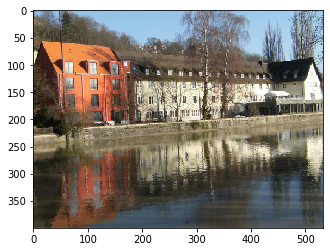

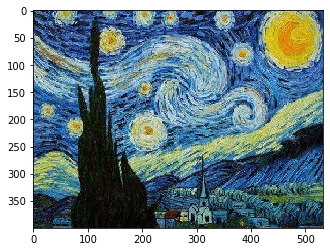

<Figure size 432x288 with 0 Axes>

In [0]:
from matplotlib import pyplot as plt

# Content image
plt.imshow(load_img(target_image_path, target_size=(img_height, img_width)))
plt.figure()

# Style image
plt.imshow(load_img(style_reference_image_path, target_size=(img_height, img_width)))
plt.figure()

# Generate image
plt.imshow(img)
plt.show()


Ne feledje, hogy ez a technika pusztán a kép újraszövegezésének vagy a textúraátvitelnek a formája. Legjobban fog működni a stílus
erősen textúrázott és önmagában hasonló referenciaképek, amelyek olyan tartalmi célokat tartalmaznak, amelyek nem igényelnek magas szintű részleteket a
annak érdekében, hogy felismerhető legyen. Általában nem lenne képes meglehetősen elvont jellegzetességek elérésére, mint például: "egy portré stílusának átvitele a
egy másik ". Az algoritmus közelebb áll a klasszikus jelfeldolgozáshoz, mint az AI-hez, tehát ne várja el, hogy mágiaként működik!

Ezenkívül vegyük figyelembe, hogy a stílusátviteli algoritmus futtatása meglehetősen lassú. A telepítés által működtetett átalakítás azonban egyszerű
elegendő ahhoz, hogy megtanulható legyen egy kicsi, gyors előrejelzésű konvnettel is - mindaddig, amíg rendelkezésre állnak a megfelelő képzési adatok. 

Gyors stílusátadás tehát úgy érhető el, ha először sok számítási ciklust költenek, hogy bemeneti-kimeneti képzési példákat hozzanak létre egy rögzített stílushoz referenciaképet, a fenti módszer használatával, majd egy egyszerű convnet-t edzhet meg ennek a stílusspecifikus transzformációnak a megtanulására. 

Ha ez megtörtént, egy adott kép stilizálása azonnal megtörténik: ez a kis konvnet csak továbblépése.


## Vigyázzon

* A stílusátvitel egy új kép létrehozásából áll, amely megőrzi a célkép "tartalmát", miközben egy kép "stílusát" is rögzíti referencia kép.
* A „tartalom” rögzíthető a convnet magas szintű aktiválásával.
* A "stílus" a convnet különböző rétegeinek aktiválása belső korrelációkkal rögzíthető.
* Ezért a mély tanulás lehetővé teszi a stílusátvitel optimalizálási folyamatként történő formálását egy előre képzett konvnettel meghatározott veszteség felhasználásával.
* Ettől az alapötlettől kezdve számos változat és finomítás lehetséges!
